<a href="https://colab.research.google.com/github/Maassoo/BigMart-Sales-Analysis-and-Prediction/blob/main/Face_Recog_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STP project phase 2: Face recognition**

---



---



Importing libraries

In [ ]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import cv2
import sys
from PIL import Image
from rembg import remove

In [ ]:
def remove_background(inputpath):
  outputpath = 'background_removed.png'
  input = Image.open(inputpath)
  output = remove(input)
  output.save(outputpath)
  return output

In [ ]:
def image_treatment(imagePath):
  image = cv2.imread(imagePath)

  # convert image to gray
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = faceCascade.detectMultiScale(gray,
    scaleFactor=1.3,
    minNeighbors=5, # number of neighbor faces (effect on the accuracy)
    minSize=(30, 30)
  )

  #print("[INFO] Found {0} Faces!".format(len(faces)))

  #print(faces)

  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  status = cv2.imwrite('faces_detected.jpg', image)
  #print("[INFO] Image faces_detected.jpg written to filesystem: ", status)
  
  img = Image.open(imagePath)
  box = (x, y, x+w, y+h)
  cropped_img = img.crop(box)
  Background_removed = cropped_img.save('Background_removed.jpg')
  return cropped_img

analysing how many component we need to represent the picture

In [ ]:
#applying PCA on the image
#importing the necessary libraries
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Load the image and convert it to grayscale
img = Image.open('/content/MESSI.jpg').convert('L') #we input here the path 

# Convert the image to a numpy array
img_arr = np.asarray(img)

In [ ]:
# Reshape the image array to have more than one feature
img_arr_reshaped = img_arr.reshape(-1, img_arr.shape[-1])

# Initialize PCA with the number of principal components to keep
k = 200 #we will optimize this number later
pca = PCA(n_components=k)

# Fit PCA on the image array
pca.fit(img_arr_reshaped)


PCA(n_components=200)

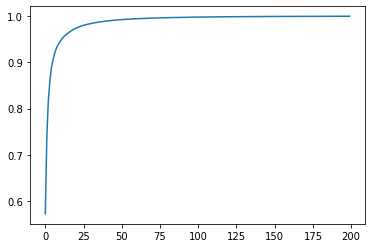

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

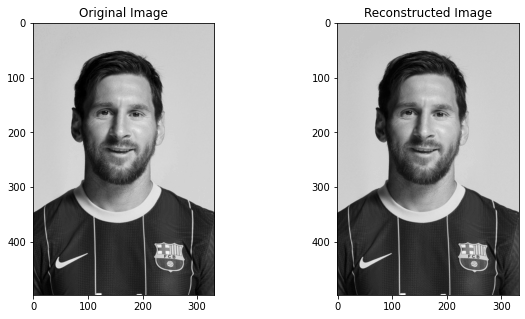

In [ ]:
projected_data = pca.transform(img_arr_reshaped)
# Reconstruct the image from the projected data
reconstructed_data = pca.inverse_transform(projected_data)
# Reshape the reconstructed data into its original dimensions
reconstructed_img = np.reshape(reconstructed_data, img_arr.shape)
# Plot the original and reconstructed images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_arr, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(reconstructed_img, cmap='gray')
ax[1].set_title('Reconstructed Image')
plt.show()

In [ ]:
#from the previous curve we notice that we can safely pick k=75
k = 20
pca = PCA(n_components=k)
# Fit PCA on the image array
pca.fit(img_arr_reshaped)
# Project the image array onto the top k principal components
projected_data = pca.transform(img_arr_reshaped)
# Reconstruct the image from the projected data
reconstructed_data = pca.inverse_transform(projected_data)
# Reshape the reconstructed data into its original dimensions
reconstructed_img = np.reshape(reconstructed_data, img_arr.shape)

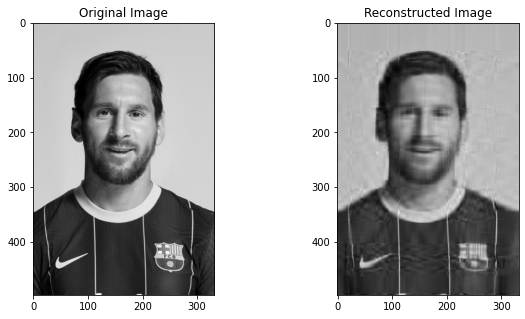

In [ ]:
# Plot the original and reconstructed images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_arr, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(reconstructed_img, cmap='gray')
ax[1].set_title('Reconstructed Image')
plt.show()

final function to call for PCA analysis

In [ ]:
def PCA_analysis(image):
  #this function should take the gray cropped image and apply pca to minimize the features
  img_arr = np.asarray(image)
  img_arr_reshaped = img_arr.reshape(-1, img_arr.shape[-1])
  pca = PCA(n_components=75)
  pca.fit(img_arr_reshaped)
  projected_data = pca.transform(img_arr_reshaped)
  reconstructed_data = pca.inverse_transform(projected_data)
  reconstructed_img = np.reshape(reconstructed_data, img_arr.shape)
  return reconstructed_img

In [ ]:
#Euclidean Distance another way
def euclidean_distance(img1_vec, img2_vec):
    distance = np.linalg.norm(img1_vec - img2_vec)
    return distance

In [ ]:
#load the treated images

front_view = image_treatment('/content/training_img1.jpeg').convert("L")
left_view = remove_background('/content/training_img2.jpeg').convert("L")
right_view = remove_background('/content/training_img3.jpeg').convert("L")
test_img = image_treatment('/content/testing_img.jpeg').convert("L")

In [ ]:
#PCA analysis on all the images
front_view_pca  = PCA_analysis(front_view)
left_view_pca  = PCA_analysis(left_view)
right_view_pca  = PCA_analysis(right_view)
test_img_pca  = PCA_analysis(test_img)

In [ ]:
shape = (400, 400)
front_view_resized = cv2.resize(front_view_pca, shape)
left_view_resized = cv2.resize(left_view_pca, shape)
right_view_resized = cv2.resize(right_view_pca, shape)
test_img_resized = cv2.resize(test_img_pca, shape)

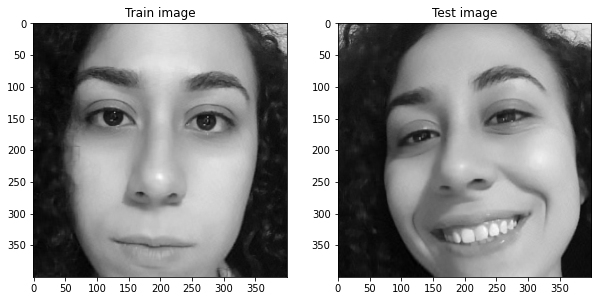

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(front_view_resized, cmap='gray')
ax[0].set_title('Train image')
ax[1].imshow(test_img_resized, cmap='gray')
ax[1].set_title('Test image')
plt.show()

In [ ]:
#making sure they all have the same shape for euclidean distance
print(front_view_resized.shape)
print(left_view_resized.shape)
print(right_view_resized.shape)
print(test_img_resized.shape)

(400, 400)
(400, 400)
(400, 400)
(400, 400)


In [ ]:
# transform 2D array of the reconsrtucted images into 1D array for comparison
front_vec = front_view_resized.flatten()
left_vec = left_view_resized.flatten()
right_vec = right_view_resized.flatten()
test_vec = test_img_resized.flatten()

In [ ]:
#get the distance between our positive test image and each of training images
pos_dist1 = euclidean_distance(front_vec, test_vec)
pos_dist2 = euclidean_distance(left_vec, test_vec)
pos_dist3 = euclidean_distance(right_vec, test_vec)
distance_list = [pos_dist1,pos_dist2,pos_dist3]
distance = sum(distance_list)/len(distance_list)
distance

33411.85023295664

In [ ]:
#we compared different pictures some were negatives some were positives to determine the threshold, 
#the threshold is the average between positve and negative
#####

#testing_img (lina): 33411.88275635027
#lina1:33649.1826189443
#lina2: 29632.923840075455
#benedict distance: 34047.919318000924
#rihana distance: 34048.04026148369
#yasmine sabry: 34606.382339823685
#sara:39770.75174375831
#messi:39408.92722812837


In [ ]:
threshold = 33900
#comparing
if (distance <= threshold):
  print("this is the same person")
else:
  print("this is not the same person")

this is the same person


Compiling everything into one function

In [ ]:
def img_fun(path1,path2,path3,path4):
    front_view = image_treatment(path1).convert("L")
    left_view = remove_background(path2).convert("L")
    right_view = remove_background(path3).convert("L")
    test_img = image_treatment(path4).convert("L")
    front_view_pca  = PCA_analysis(front_view)
    left_view_pca  = PCA_analysis(left_view)
    right_view_pca  = PCA_analysis(right_view)
    test_img_pca  = PCA_analysis(test_img)
    shape = (400, 400)
    front_view_resized = cv2.resize(front_view_pca, shape)
    left_view_resized = cv2.resize(left_view_pca, shape)
    right_view_resized = cv2.resize(right_view_pca, shape)
    test_img_resized = cv2.resize(test_img_pca, shape)
    front_vec = front_view_resized.flatten()
    left_vec = left_view_resized.flatten()
    right_vec = right_view_resized.flatten()
    test_vec = test_img_resized.flatten()
    pos_dist1 = euclidean_distance(front_vec, test_vec)
    pos_dist2 = euclidean_distance(left_vec, test_vec)
    pos_dist3 = euclidean_distance(right_vec, test_vec)
    distance_list = [pos_dist1,pos_dist2,pos_dist3]
    distance = sum(distance_list)/len(distance_list)
    threshold = 33900
    if (distance <= threshold):
       return(print("this is the same person"))
    else:
       return(print("this is not the same person"))

In [ ]:
img_fun('/content/training_img1.jpeg','/content/training_img2.jpeg','/content/training_img3.jpeg','/content/testing_img.jpeg')

this is the same person
